In [6]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('/Users/danstechman/GoogleDrive/School/Research/PECAN/FlightLevel/FLplot/')

from getFLpathData import getFLpathData as getFL

%matplotlib inline

In [2]:
pddSprlTimes = np.load('/Users/danstechman/GoogleDrive/School/Research/PECAN/Radar/code/samuraiAnalysis/pecan_PDD-Sprl_times/20150706_pddSprl_times.npy')[()]
flS = pddSprlTimes['I20P_strtDT'][5]
flE = pddSprlTimes['I20P_endDT'][5]
flData = getFL('/Users/danstechman/GoogleDrive/PECAN-Data/FlightLevelData/Processed/20150706_FltLvl_Processed.nc',flS,flE)

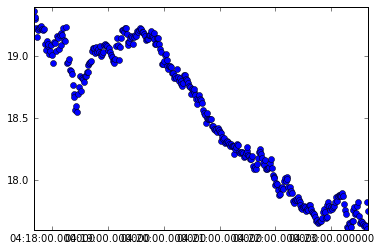

In [7]:
plt.plot_date(flData['datetime'],flData['temp'])